In [1]:
#read in the list file for a CSV
import pandas as pd
df = pd.read_csv ('/Users/christopherbarnes/cmsc25910/Assignment6/listings.csv')
print(df)

            id                                               name    host_id  \
0         2384  Hyde Park - Walk to UChicago, 10 min to McCormick       2613   
1         4505  394 Great Reviews. 127 y/o House. 40 yds to tr...       5775   
2         7126                Tiny Studio Apartment 94 Walk Score      17928   
3         9811                      Barbara's Hideaway - Old Town      33004   
4        10610                   3 Comforts of Cooperative Living       2140   
...        ...                                                ...        ...   
6392  45514091   Best view of Chicago downtown + optional parking  367907062   
6393  45514389   Luxurious 3Br/2Ba with optional parking and View  367907062   
6394  45514632  Two story Penthouse w private Rooftop & Great ...  367907062   
6395  45515281                             West Town Private Room  347064639   
6396  45515581            Chicago Themed Private Garden Apartment   19541995   

             host_name  neighbourhood_g

In [2]:
print(df.columns)

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


In [3]:
df.drop(columns= ['id', 'name', 'host_id', 'host_name'])

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,NaN,Hyde Park,41.78790,-87.58780,Private room,60,2,178,2019-12-15,2.56,1,353
1,NaN,South Lawndale,41.85495,-87.69696,Entire home/apt,105,2,395,2020-07-14,2.81,1,155
2,NaN,West Town,41.90289,-87.68182,Entire home/apt,60,2,384,2020-03-08,2.81,1,321
3,NaN,Lincoln Park,41.91769,-87.63788,Entire home/apt,65,4,49,2019-10-23,0.63,9,300
4,NaN,Hyde Park,41.79612,-87.59261,Private room,21,1,44,2020-02-14,0.61,5,168
...,...,...,...,...,...,...,...,...,...,...,...,...
6392,NaN,Near South Side,41.85574,-87.62507,Entire home/apt,146,2,0,NaN,NaN,4,180
6393,NaN,Near South Side,41.85561,-87.62342,Entire home/apt,195,2,0,NaN,NaN,4,180
6394,NaN,Near South Side,41.85584,-87.62404,Entire home/apt,493,2,0,NaN,NaN,4,177
6395,NaN,West Town,41.89005,-87.66668,Private room,53,32,0,NaN,NaN,1,83


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,mean_absolute_error 
import pickle

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'host_id'}>,
        <AxesSubplot:title={'center':'neighbourhood_group'}>],
       [<AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'price'}>],
       [<AxesSubplot:title={'center':'minimum_nights'}>,
        <AxesSubplot:title={'center':'number_of_reviews'}>,
        <AxesSubplot:title={'center':'reviews_per_month'}>],
       [<AxesSubplot:title={'center':'calculated_host_listings_count'}>,
        <AxesSubplot:title={'center':'availability_365'}>,
        <AxesSubplot:>]], dtype=object)

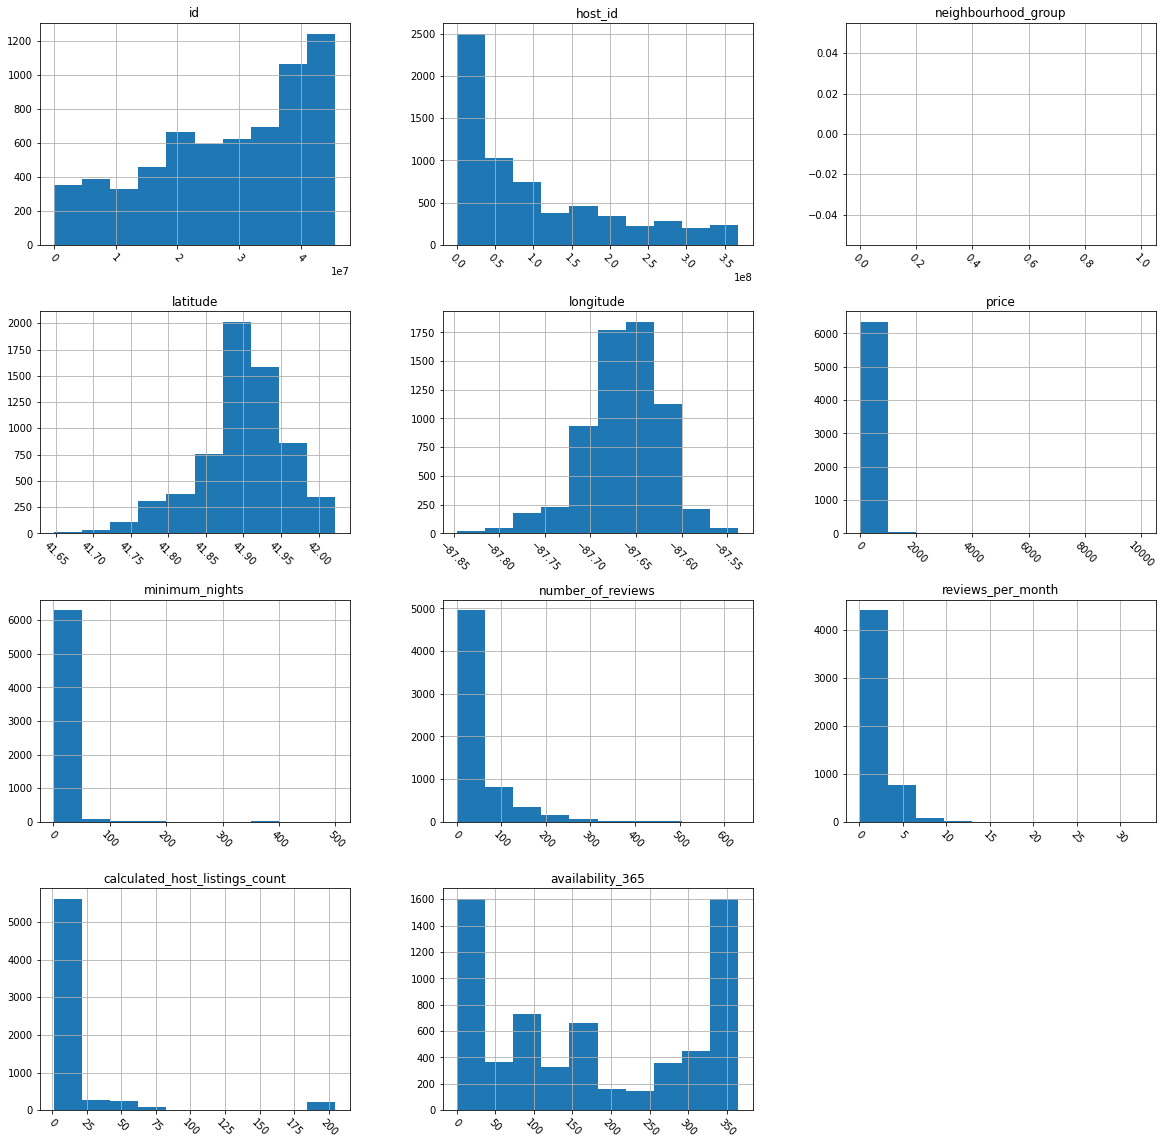

In [5]:
df.hist(figsize=(20,20), xrot=-45)

<AxesSubplot:xlabel='price'>

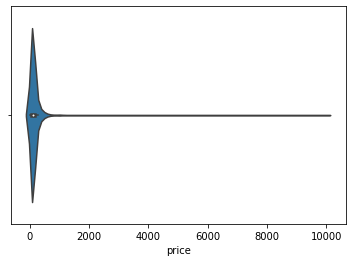

In [6]:
sns.violinplot(data=df, x='price')

In [7]:
df.select_dtypes(exclude=['object']).isnull().sum()

id                                   0
host_id                              0
neighbourhood_group               6397
latitude                             0
longitude                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 1132
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [8]:
#removing neighborhood groups since there isnt data there
df_new = df.drop('neighbourhood_group', axis=1)
df = df_new
#df.drop(columns = ['neighbourhood_group'])
print(df.columns)

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')


In [9]:
#filling in the spots with 0 where there are no reviews per month
df.reviews_per_month.fillna(0, inplace=True)
df.select_dtypes(exclude=['object']).isnull().sum()

id                                0
host_id                           0
latitude                          0
longitude                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [10]:
df.dropna(axis=0)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2384,"Hyde Park - Walk to UChicago, 10 min to McCormick",2613,Rebecca,Hyde Park,41.78790,-87.58780,Private room,60,2,178,2019-12-15,2.56,1,353
1,4505,394 Great Reviews. 127 y/o House. 40 yds to tr...,5775,Craig & Kathleen,South Lawndale,41.85495,-87.69696,Entire home/apt,105,2,395,2020-07-14,2.81,1,155
2,7126,Tiny Studio Apartment 94 Walk Score,17928,Sarah,West Town,41.90289,-87.68182,Entire home/apt,60,2,384,2020-03-08,2.81,1,321
3,9811,Barbara's Hideaway - Old Town,33004,At Home Inn,Lincoln Park,41.91769,-87.63788,Entire home/apt,65,4,49,2019-10-23,0.63,9,300
4,10610,3 Comforts of Cooperative Living,2140,Lois,Hyde Park,41.79612,-87.59261,Private room,21,1,44,2020-02-14,0.61,5,168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6318,45351578,Spacious Modern Vibe Avondale/Logan -Entire Apt,77382816,Edmund,Avondale,41.94060,-87.72281,Entire home/apt,67,1,2,2020-09-20,2.00,1,307
6325,45368527,Private Bedroom in Chicago Near Lincoln Square...,128265803,Victor,North Park,41.99222,-87.71659,Private room,24,1,2,2020-09-20,2.00,4,14
6329,45386114,BEST PRICE for a studio in Wrigleyville-Boystown,324740940,Andrea,Uptown,41.95513,-87.65095,Entire home/apt,97,1,2,2020-09-19,2.00,4,81
6349,45433310,Luxury King size (78*82) bedroom with free par...,111872967,Julie,Near West Side,41.87195,-87.66456,Private room,54,1,1,2020-09-18,1.00,4,359


<AxesSubplot:>

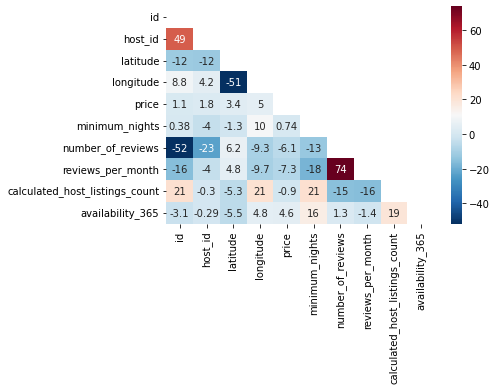

In [11]:
# mask out upper triangle
mask = np.zeros_like(df.corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True
# heatmap
sns.heatmap(df.corr()*100, 
           cmap='RdBu_r', 
           annot = True, 
           mask = mask)

In [12]:
lat = df['latitude']
long = df['longitude']

#print(len(lat))
#print(len(long))

def truncatingcoor():
    i = 0
    templat = []
    templong = []
    
    while i < len(lat):
        templat.append(round(lat[i], 1))
        templong.append(round(long[i], 1))
        i += 1
    
    df['latitude'] = templat
    df['longitude'] = templong
    
    
    
truncatingcoor()

In [13]:
print(df['latitude'])
print(df['longitude'])

0       41.8
1       41.9
2       41.9
3       41.9
4       41.8
        ... 
6392    41.9
6393    41.9
6394    41.9
6395    41.9
6396    41.8
Name: latitude, Length: 6397, dtype: float64
0      -87.6
1      -87.7
2      -87.7
3      -87.6
4      -87.6
        ... 
6392   -87.6
6393   -87.6
6394   -87.6
6395   -87.7
6396   -87.6
Name: longitude, Length: 6397, dtype: float64


In [14]:
#i noticed when running the code two boxes down in count values that there were over 1000 entries where
#the availability was 0 which means that the air bnbs were not available at all to rent any days of the year
#so i chose to remove them from the data frame
df.drop(df.index[df['availability_365'] == 0], inplace=True)

In [15]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [16]:
print("neighborhood types: ")
print(df.neighbourhood.value_counts())

print()

print("latitude types:")
print(df.latitude.value_counts())

print()

print("longitutde types:")
print(df.longitude.value_counts())

print()

print("room types:")
print(df.room_type.value_counts())

print()

print("price types:")
print(df.price.value_counts())

print()

print("minimum night types:")
print(df.minimum_nights.value_counts())

print()

print("host listings counts types:")
print(df.calculated_host_listings_count.value_counts())

print()

print("availability types:")
print(df.availability_365.value_counts())

neighborhood types: 
Near North Side    571
West Town          547
Lake View          423
Loop               317
Logan Square       306
                  ... 
Edison Park          2
Mount Greenwood      2
Riverdale            2
Clearing             1
East Side            1
Name: neighbourhood, Length: 77, dtype: int64

latitude types:
41.9    3407
42.0     912
41.8     773
41.7     100
41.6       1
Name: latitude, dtype: int64

longitutde types:
-87.7    2921
-87.6    2013
-87.8     243
-87.5      16
Name: longitude, dtype: int64

room types:
Entire home/apt    3619
Private room       1443
Hotel room           70
Shared room          61
Name: room_type, dtype: int64

price types:
75      103
50      102
150      99
80       95
65       85
       ... 
13        1
433       1
3000      1
498       1
493       1
Name: price, Length: 487, dtype: int64

minimum night types:
2      1628
1      1486
3       729
30      336
31      144
4       137
32      109
7       101
5        95
14       6

In [17]:
#pick 3 categorical variables
#1. coordinates
#2. neighborhood
#3. room types

In [18]:
#handling sparcity in latitude
lats = df.latitude.value_counts()
print(lats)

41.9    3407
42.0     912
41.8     773
41.7     100
41.6       1
Name: latitude, dtype: int64


In [19]:
#dropping the outlier
df.drop(df.index[df['latitude'] == lats.index[len(lats) - 1]], inplace=True)
print(df.latitude.value_counts())

41.9    3407
42.0     912
41.8     773
41.7     100
Name: latitude, dtype: int64


In [20]:
longs = df.longitude.value_counts()
print(longs)

-87.7    2921
-87.6    2012
-87.8     243
-87.5      16
Name: longitude, dtype: int64


In [21]:
#df.drop(df.index[df['longitude'] == longs.index[len(longs) - 1]], inplace=True)
#print(df.longitude.value_counts())

In [22]:
#handling sparcity with neighborhood
#doing regions instead of neighborhoods... adding a column for that in the dataframe

ns = df['neighbourhood']

central = ['Near North Side', 'Loop', 'Near South Side']
farnorthside = ['Ohare', 'Edison Park', 'Norwood Park', 'Jefferson Park',
               'Forest Glen', 'North Park', 'Albany Park','West Ridge', 
               'Lincoln Square', 'Rogers Park', 'Edgewater', 'Uptown']
farsoutheastside = ['Chatham', 'Avalon Park', 'South Chicago',
                   'Calumet Heights', 'Pullman', 'Roseland','South Deering', 
                   'West Pullman', 'Riverdale', 'East Side', 'Burnside', 'Hegewisch']
farsouthwestside = ['Ashburn', 'Auburn Gresham', 'Beverly', 'Washington Heights',
                   'Morgan Park', 'Mount Greenwood']
northside = ['North Center', 'Lincoln Park', 'Lake View', 'Avondale', 'Logan Square']
northwestside = ['Dunning', 'Portage Park', 'Irving Park', 'Belmont Cragin',
                'Hermosa', 'Montclare']
southside = ['Armour Square', 'Bridgeport', 'Douglas', 'Kenwood', 'Oakland',
            'Grand Boulevard', 'Hyde Park', 'Washington Park', 'Woodlawn',
            'Greater Grand Crossing', 'South Shore', 'Fuller Park', ]
southwestside = ['Mckinley Park', 'New City', 'Englewood', 'West Englewood',
                'Brighton Park', 'Gage Park', 'Chicago Lawn', 'Archer Heights', 
                'West Elsdon', 'West Lawn', 'Garfield Ridge', 'Clearing']
westside = ['Austin', 'Humboldt Park', 'East Garfield Park', 'West Garfield Park', 
           'North Lawndale', 'South Lawndale', 'West Town', 'Near West Side',  
            'Lower West Side'] 

def toregs():
    comms = []
    for n in ns:
        if (n in central):
            comms.append('Central')
        elif (n in farnorthside):
            comms.append('Far North Side')
        elif(n in farsoutheastside):
            comms.append('Far Southeast Side')
        elif (n in farsouthwestside):
            comms.append("Far Southwest Side")
        elif (n in northside):
            comms.append("North Side")
        elif (n in northwestside):
            comms.append("Northwest Side")
        elif (n in southside):
            comms.append("South Side")
        elif (n in southwestside):
            comms.append("Southwest Side")
        elif (n in westside):
            comms.append("West Side")
        else:
            print(n)
    df['community'] = comms

toregs()
print(df['community'])

0       South Side
1        West Side
2        West Side
3       North Side
4       South Side
           ...    
6392       Central
6393       Central
6394       Central
6395     West Side
6396    South Side
Name: community, Length: 5192, dtype: object


In [23]:
community = df.community.value_counts()
print(community)

North Side            1207
West Side             1192
Central               1012
Far North Side         658
South Side             640
Northwest Side         261
Southwest Side         115
Far Southeast Side      76
Far Southwest Side      31
Name: community, dtype: int64


In [24]:
#handling scarcity with room types
rooms = df.room_type.value_counts()
print(rooms)
#dont need to clean up

Entire home/apt    3619
Private room       1442
Hotel room           70
Shared room          61
Name: room_type, dtype: int64


<AxesSubplot:xlabel='count', ylabel='latitude'>

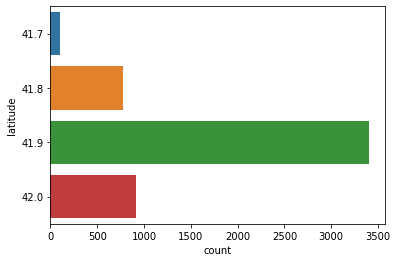

In [25]:
#plotting latitude
sns.countplot(y = 'latitude', data = df)

<AxesSubplot:xlabel='count', ylabel='longitude'>

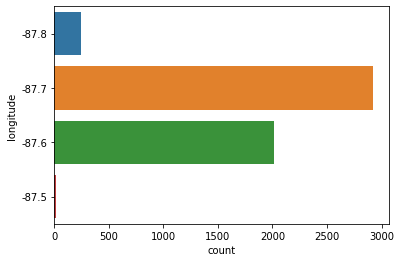

In [26]:
#plotting longitude
sns.countplot(y = 'longitude', data = df)

<AxesSubplot:xlabel='count', ylabel='community'>

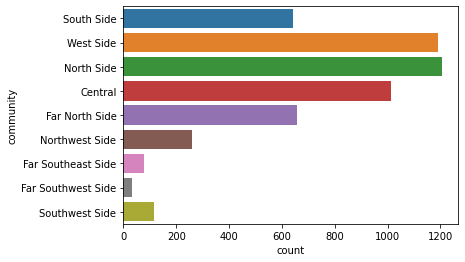

In [27]:
#plotting neighbourhood
sns.countplot(y = 'community', data = df)

<AxesSubplot:xlabel='count', ylabel='room_type'>

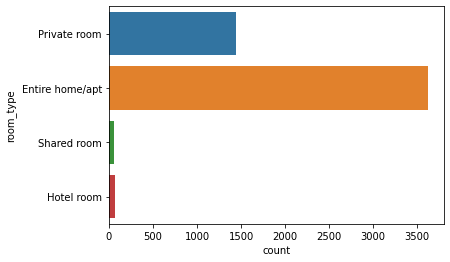

In [28]:
sns.countplot(y = 'room_type', data = df)

In [29]:
df = df.dropna()
print(df)

            id                                               name    host_id  \
0         2384  Hyde Park - Walk to UChicago, 10 min to McCormick       2613   
1         4505  394 Great Reviews. 127 y/o House. 40 yds to tr...       5775   
2         7126                Tiny Studio Apartment 94 Walk Score      17928   
3         9811                      Barbara's Hideaway - Old Town      33004   
4        10610                   3 Comforts of Cooperative Living       2140   
...        ...                                                ...        ...   
6318  45351578    Spacious Modern Vibe Avondale/Logan -Entire Apt   77382816   
6325  45368527  Private Bedroom in Chicago Near Lincoln Square...  128265803   
6329  45386114   BEST PRICE for a studio in Wrigleyville-Boystown  324740940   
6349  45433310  Luxury King size (78*82) bedroom with free par...  111872967   
6366  45465696        Cozy Garden Room in the middle of Boystown!    8803468   

             host_name   neighbourhood 

In [30]:
print(df['price'])

0        60
1       105
2        60
3        65
4        21
       ... 
6318     67
6325     24
6329     97
6349     54
6366     92
Name: price, Length: 4248, dtype: int64


In [31]:
max_value = df['price'].max()
min_value = df['price'].min()
median = df['price'].median()

print(max_value)
print(min_value)
print(median)

10000
10
98.0


In [32]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
prices = df['price']
def pricebin():
    temp = []
    for p in prices:
        if p < 50:
            temp.append("< 50")
        elif p < 100:
            temp.append("50 - 99")
        elif p < 150:
            temp.append('100 - 149')
        elif p < 200:
            temp.append('150 - 199')
        elif p < 250:
            temp.append('200 - 249')
        else:
            temp.append('250 +')
    return temp

df['price_range'] = pricebin()
print(df['price_range'])

0         50 - 99
1       100 - 149
2         50 - 99
3         50 - 99
4            < 50
          ...    
6318      50 - 99
6325         < 50
6329      50 - 99
6349      50 - 99
6366      50 - 99
Name: price_range, Length: 4248, dtype: object


In [33]:
df = pd.get_dummies(df, columns = ['latitude', 'longitude', 'room_type', 'community', 'price_range'])

In [34]:
print(df)

            id                                               name    host_id  \
0         2384  Hyde Park - Walk to UChicago, 10 min to McCormick       2613   
1         4505  394 Great Reviews. 127 y/o House. 40 yds to tr...       5775   
2         7126                Tiny Studio Apartment 94 Walk Score      17928   
3         9811                      Barbara's Hideaway - Old Town      33004   
4        10610                   3 Comforts of Cooperative Living       2140   
...        ...                                                ...        ...   
6318  45351578    Spacious Modern Vibe Avondale/Logan -Entire Apt   77382816   
6325  45368527  Private Bedroom in Chicago Near Lincoln Square...  128265803   
6329  45386114   BEST PRICE for a studio in Wrigleyville-Boystown  324740940   
6349  45433310  Luxury King size (78*82) bedroom with free par...  111872967   
6366  45465696        Cozy Garden Room in the middle of Boystown!    8803468   

             host_name   neighbourhood 

In [35]:
df.to_csv('/Users/christopherbarnes/cmsc25910/Assignment6/cleandata.csv')

In [36]:
print(df.columns)

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'latitude_41.7', 'latitude_41.8', 'latitude_41.9',
       'latitude_42.0', 'longitude_-87.8', 'longitude_-87.7',
       'longitude_-87.6', 'longitude_-87.5', 'room_type_Entire home/apt',
       'room_type_Hotel room', 'room_type_Private room',
       'room_type_Shared room', 'community_Central',
       'community_Far North Side', 'community_Far Southeast Side',
       'community_Far Southwest Side', 'community_North Side',
       'community_Northwest Side', 'community_South Side',
       'community_Southwest Side', 'community_West Side',
       'price_range_100 - 149', 'price_range_150 - 199',
       'price_range_200 - 249', 'price_range_250 +', 'price_range_50 - 99',
       'price_range_< 50'],
      dtype='object')


In [37]:
import numpy as np
import pandas as pd

# define the data/predictors as the pre-set feature names  
df1 = pd.DataFrame(df, columns=['latitude_41.7', 'latitude_41.8', 'latitude_41.9',
       'latitude_42.0', 'longitude_-87.8', 'longitude_-87.7',
       'longitude_-87.6', 'longitude_-87.5', 'room_type_Entire home/apt',
       'room_type_Hotel room', 'room_type_Private room',
       'room_type_Shared room', 'community_Central',
       'community_Far North Side', 'community_Far Southeast Side',
       'community_Far Southwest Side', 'community_North Side',
       'community_Northwest Side', 'community_South Side',
       'community_Southwest Side', 'community_West Side'])

target = pd.DataFrame(df, columns=["price"])

In [38]:
#did not chose this method to analyze as i believe it is too similar to an article i was
#using to the article i was using to clean the data
import numpy as np
from sklearn.model_selection import train_test_split

import pandas
from sklearn import linear_model
import statsmodels.api as sm

X = df[['latitude_41.7', 'latitude_41.8', 'latitude_41.9',
       'latitude_42.0', 'longitude_-87.8', 'longitude_-87.7',
       'longitude_-87.6', 'longitude_-87.5', 'room_type_Entire home/apt',
       'room_type_Hotel room', 'room_type_Private room',
       'room_type_Shared room', 'community_Central',
       'community_Far North Side', 'community_Far Southeast Side',
       'community_Far Southwest Side', 'community_North Side',
       'community_Northwest Side', 'community_South Side',
       'community_Southwest Side', 'community_West Side']]
y = df['price']


# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     8.812
Date:                Sun, 22 May 2022   Prob (F-statistic):           7.62e-23
Time:                        09:25:31   Log-Likelihood:                -31459.
No. Observations:                4248   AIC:                         6.295e+04
Df Residuals:                    4230   BIC:                         6.307e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
latitude_41.7                   -6.9716    132.274     -0.053      0.958    -266.297     252.354
latitude_41.8                   21.9867     49.099      0.448      0.654     -74.272     118.246
latitude_41.9                   79.8746     48.457      1.648      0.099     -15.127     174.876
latitude_42.0                  155.5766     53.929      2.885      0.004      49.848     261.306
longitude_-87.8                 23.5337     35.760      0.658      0.511     -46.574      93.641
longitude_-87.7                 46.4271     26.274      1.767      0.077      -5.084      97.938
longitude_-87.6                 80.6074     27.199      2.964      0.003      27.283     133.931
longitude_-87.5                 99.8982     99.110      1.008      0.314     -94.410     294.207
room_type_Entire home/apt       -0.5517     17.218     -0.032      0.974     -34.308      33.205
room_type_Hotel room           415.4089     45.490      9.132      0.000     326.225     504.593
room_type_Private room         -66.7650     18.586     -3.592      0.000    -103.202     -30.328
room_type_Shared room          -97.6259     48.049     -2.032      0.042    -191.827      -3.425
community_Central               50.1178     47.639      1.052      0.293     -43.279     143.515
community_Far North Side       -61.1839     52.645     -1.162      0.245    -164.395      42.027
community_Far Southeast Side    31.8181    138.077      0.230      0.818    -238.885     302.521
community_Far Southwest Side    74.7530    138.820      0.538      0.590    -197.407     346.913
community_North Side            50.7687     44.742      1.135      0.257     -36.949     138.486
community_Northwest Side       -14.0799     51.817     -0.272      0.786    -115.669      87.509
community_South Side            30.4373     48.584      0.626      0.531     -64.813     125.688
community_Southwest Side        55.1627     58.319      0.946      0.344     -59.173     169.498
community_West Side             32.6727     44.805      0.729      0.466     -55.169     120.514
==============================================================================
Omnibus:                     9396.182   Durbin-Watson:                   1.468
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         41075827.346
Skew:                          20.336   Prob(JB):                         0.00
Kurtosis:                     483.013   Cond. No.                     4.93e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.17e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [53]:
import pandas
from sklearn import linear_model

df = pandas.read_csv("/Users/christopherbarnes/cmsc25910/Assignment6/cleandata.csv")

X = df[['latitude_41.7', 'latitude_41.8', 'latitude_41.9',
       'latitude_42.0', 'longitude_-87.8', 'longitude_-87.7',
       'longitude_-87.6', 'longitude_-87.5', 'room_type_Entire home/apt',
       'room_type_Hotel room', 'room_type_Private room',
       'room_type_Shared room', 'community_Central',
       'community_Far North Side', 'community_Far Southeast Side',
       'community_Far Southwest Side', 'community_North Side',
       'community_Northwest Side', 'community_South Side',
       'community_Southwest Side', 'community_West Side']]
y = df['price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)


regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

#predictedCO2 = regr.predict([[3300, 1300]])

predicted = regr.predict(X_test)

print(predicted)


[106.  64. 174. 202.  74. 264.  14. 106. 130. 142. 202. 174. 106. 208.
 174. 142. 106.  64. 174. 106.  74. 174. 208.  74. 174.  84. 174. 142.
 130. 174. 208. 208. 174.  84. 174. 130.  74. 182.  24.  74. 174. 156.
  74. 208. 174.  74. 114.  24. 134. 174.  64. 174.  74. 208.  64. 130.
 130.  68. 130. 174.  64. 186. 174. 208. 130. 174.  42.  14.  24. 208.
 208. 208. 174. 174. 174. 114. 174. 202. 174.  96. 174.  74. 106. 174.
 174. 174.  74. 542. 174. 174. 208.  84. 208. 106.  98. 174. 208. 542.
 -34.  64.  74. 208. 208. 106. 156.  92. 106.  64. 208. 208.  74. 142.
 174. 174. 130. 208. 142. 174. 208. 174. 142. 114. 208. 110. 174. 174.
 208. 208. 156. 202.  74. 174. 208. 106. 174.  74. 174. 208. 130. 130.
 174. 174. 174. 174. 130. 114. 130. 174.  64. 130. 264. 130. 130. 174.
 106. 208. 208. 112. 174. 208. 226. 130. 174. 174. 106. 110.  64. 174.
 130. 106. 208. 174. 174. 174. 130. 174. 142.  64.  74. 174. 208.  64.
 130. 174. 106. 174. 142. 208. 202. 208. 174. 208. 136. 130. 174. 174.
 264. 

In [69]:
#finding the root mean square
import sklearn
import math
mse = sklearn.metrics.mean_squared_error(y_test, predicted)
rmse = math.sqrt(mse)
r_sq = model.score(X_test, y_test)

max_price = df['price'].max()

print('coefficients: ')
print(regr.coef_)
print('')
print('max price of the air bnb: ')
print(max_price)
print('')
print('mean square error: ')
print(mse)
print('')
print('root mean square error: ')
print(rmse)
print('')
print('coefficient of determination: ')
print(r_sq)
print('')
print('predicted values:')
print(predicted)


coefficients: 
[ 4.61069277e+15  4.61069277e+15  4.61069277e+15  4.61069277e+15
 -9.85258562e+14 -9.85258562e+14 -9.85258562e+14 -9.85258562e+14
  2.52068371e+15  2.52068371e+15  2.52068371e+15  2.52068371e+15
  7.09269848e+15  7.09269848e+15  7.09269848e+15  7.09269848e+15
  7.09269848e+15  7.09269848e+15  7.09269848e+15  7.09269848e+15
  7.09269848e+15]

max price of the air bnb: 
10000

mean square error: 
125210.58705882353

root mean square error: 
353.85108034146725

coefficient of determination: 
0.06474711996980087

predicted values:
[106.  64. 174. 202.  74. 264.  14. 106. 130. 142. 202. 174. 106. 208.
 174. 142. 106.  64. 174. 106.  74. 174. 208.  74. 174.  84. 174. 142.
 130. 174. 208. 208. 174.  84. 174. 130.  74. 182.  24.  74. 174. 156.
  74. 208. 174.  74. 114.  24. 134. 174.  64. 174.  74. 208.  64. 130.
 130.  68. 130. 174.  64. 186. 174. 208. 130. 174.  42.  14.  24. 208.
 208. 208. 174. 174. 174. 114. 174. 202. 174.  96. 174.  74. 106. 174.
 174. 174.  74. 542. 174. 

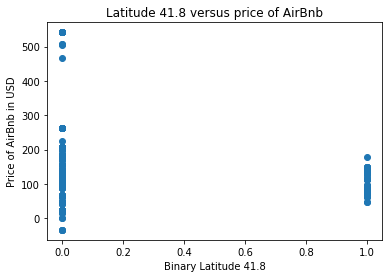

In [76]:
plt.scatter(X_test['latitude_41.8'], predicted)
plt.title('Latitude 41.8 versus price of AirBnb')
plt.xlabel('Binary Latitude 41.8')
plt.ylabel('Price of AirBnb in USD')
plt.show()

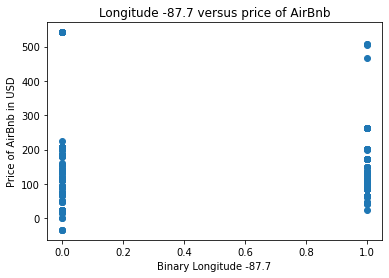

In [77]:
plt.scatter(X_test['longitude_-87.7'], predicted)
plt.title('Longitude -87.7 versus price of AirBnb')
plt.xlabel('Binary Longitude -87.7')
plt.ylabel('Price of AirBnb in USD')
plt.show()

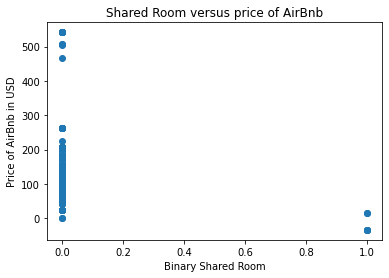

In [78]:
plt.scatter(X_test['room_type_Shared room'], predicted)
plt.title('Shared Room versus price of AirBnb')
plt.xlabel('Binary Shared Room')
plt.ylabel('Price of AirBnb in USD')
plt.show()

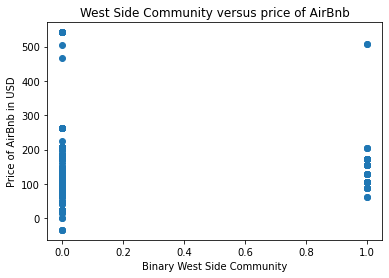

In [79]:
plt.scatter(X_test['community_West Side'], predicted)
plt.title('West Side Community versus price of AirBnb')
plt.xlabel('Binary West Side Community')
plt.ylabel('Price of AirBnb in USD')
plt.show()

Feature: 0, Score: 4610692765689105.00000
Feature: 1, Score: 4610692765689112.00000
Feature: 2, Score: 4610692765689157.00000
Feature: 3, Score: 4610692765689247.00000
Feature: 4, Score: -985258561762216.37500
Feature: 5, Score: -985258561762197.00000
Feature: 6, Score: -985258561762168.50000
Feature: 7, Score: -985258561762101.50000
Feature: 8, Score: 2520683712428217.00000
Feature: 9, Score: 2520683712428549.50000
Feature: 10, Score: 2520683712428149.50000
Feature: 11, Score: 2520683712428117.00000
Feature: 12, Score: 7092698479510621.00000
Feature: 13, Score: 7092698479510483.00000
Feature: 14, Score: 7092698479510532.00000
Feature: 15, Score: 7092698479510585.00000
Feature: 16, Score: 7092698479510616.00000
Feature: 17, Score: 7092698479510552.00000
Feature: 18, Score: 7092698479510600.00000
Feature: 19, Score: 7092698479510636.00000
Feature: 20, Score: 7092698479510616.00000


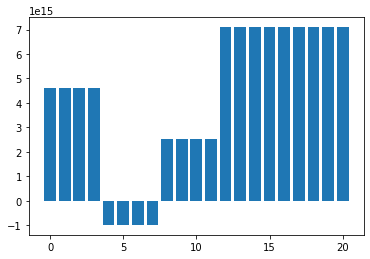

"\ndf[['latitude_41.7', 'latitude_41.8', 'latitude_41.9',\n       'latitude_42.0', 'longitude_-87.8', 'longitude_-87.7',\n       'longitude_-87.6', 'longitude_-87.5', 'room_type_Entire home/apt',\n       'room_type_Hotel room', 'room_type_Private room',\n       'room_type_Shared room', 'community_Central',\n       'community_Far North Side', 'community_Far Southeast Side',\n       'community_Far Southwest Side', 'community_North Side',\n       'community_Northwest Side', 'community_South Side',\n       'community_Southwest Side', 'community_West Side']]\n"

In [42]:
import matplotlib.pyplot as plt
# get importance
importance = regr.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

'''
df[['latitude_41.7', 'latitude_41.8', 'latitude_41.9',
       'latitude_42.0', 'longitude_-87.8', 'longitude_-87.7',
       'longitude_-87.6', 'longitude_-87.5', 'room_type_Entire home/apt',
       'room_type_Hotel room', 'room_type_Private room',
       'room_type_Shared room', 'community_Central',
       'community_Far North Side', 'community_Far Southeast Side',
       'community_Far Southwest Side', 'community_North Side',
       'community_Northwest Side', 'community_South Side',
       'community_Southwest Side', 'community_West Side']]
'''